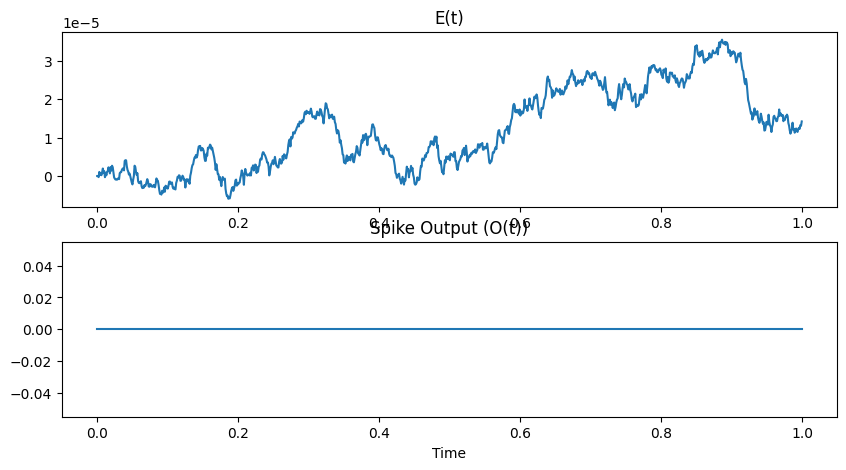

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
eta = 0.1  # Updater rate
gamma = 0.5  # Design constant
tau = 0.1  # Decay time constant
v_thr = 1.0  # Threshold voltage
v_reset = 0.0  # Reset voltage
t_ref = 0.05  # Refractory period
T = 1.0  # Simulation time
dt = 0.001  # Time step

# Initialize variables
t = np.arange(0, T, dt)
E = np.zeros_like(t)
R = np.zeros_like(t)
O = np.zeros_like(t)
I = np.random.randn(len(t))  # Replace with your input current

# Define the time-varying function (t)
def time_varying_function(t):
    return 1 - 1 / (1 + np.exp(-2 * t / tau))

# Simulate the SNN dynamics
for i in range(1, len(t)):
    dE_dt = eta * E[i-1] + R[i-1] * I[i]
    E[i] = E[i-1] + dt * dE_dt

    if E[i] > v_thr:
        E[i] = v_reset
        O[i] = 1

    R[i] = t[i] - t[i-1] - t_ref * O[i]

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, E)
plt.title('E(t)')

plt.subplot(2, 1, 2)
plt.plot(t, O)
plt.title('Spike Output (O(t))')
plt.xlabel('Time')
plt.show()
